# Improve the Accuracy of the Classification Model using PCA

In this demo, we will use the Breast cancer Wisconsin (diagnostic) dataset. This dataset contains 30 numerical features, with two target labels (WDBC-Malignant & WDBC-Benign). We will use the k-nearest neighbors (kNN) algorithm to classify the dataset into two labels. 

This demo aims to show how PCA can improve model accuracy and the training process with fewer features.

### Load Packages

In [ ]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [ ]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

In [ ]:
print("Number of features: {}".format(X.shape[1]))
print("Number of samples: {}".format(X.shape[0]))
print("Number of labels: {}".format(np.unique(y).shape[0]))

Number of features: 30
Number of samples: 569
Number of labels: 2


## Split & Standardize the dataset

In [ ]:
# Split into training and testing sets.

X_train, X_test, y_train, y_test = (train_test_split(X, y, test_size=0.2, random_state=216))

In [ ]:
# Standardize the features

SC = StandardScaler()
X_train_std = SC.fit_transform(X_train)
X_test_std = SC.transform(X_test)

## Classification without PCA

### Define & train model


In [ ]:
knn_model = KNeighborsClassifier()
knn_model = knn_model.fit(X_train_std, y_train)

### Evaluate model performance

In [ ]:
prediction = knn_model.predict(X_test_std)
acc_withot_pca = accuracy_score(y_test, prediction)

print("Model Accuracy without PCA: {}".format(acc_withot_pca))

Model Accuracy without PCA: 0.9736842105263158


We achieve more than **97% accuracy** without using PCA. But we need to use all of the features to achieve this accuracy.

Let's see how to improve the training process and model accuracy with fewer features.

## Classification with PCA

### Implement PCA to reduce the dimension of the dataset 

In [ ]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)

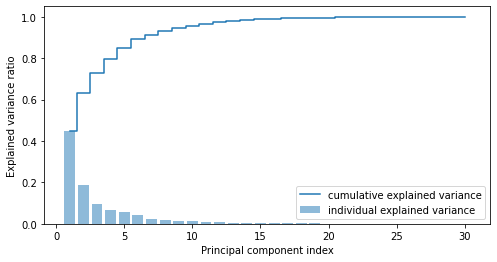

In [ ]:
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

ax, fig = plt.subplots(1,1,figsize=(8, 4))
# Plot explained variances.
plt.bar(range(1, 31), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 31), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [ ]:
# Initialize PCA
pca = PCA(n_components=6)

# Fit and transform the training data.
X_train_pca = pca.fit_transform(X_train_std)

# Transform the testing data
X_test_pca = pca.transform(X_test_std)

### Define the model

In [ ]:
knn_model_pca = KNeighborsClassifier()
knn_model_pca = knn_model_pca.fit(X_train_pca, y_train)

### Evaluate model performance

In [ ]:
prediction = knn_model_pca.predict(X_test_pca)
acc_with_pca = accuracy_score(y_test, prediction)
print("Model Accuracy with PCA: {}".format(acc_with_pca))

Model Accuracy with PCA: 0.9824561403508771


With PCA we can achieve more than **98% accuracy** with only 6 features.